In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

water_data = pd.read_csv("./data/dataset_parameters.csv", delimiter=" ") #delimiterはデータセットの列を区切るための文字の指定。

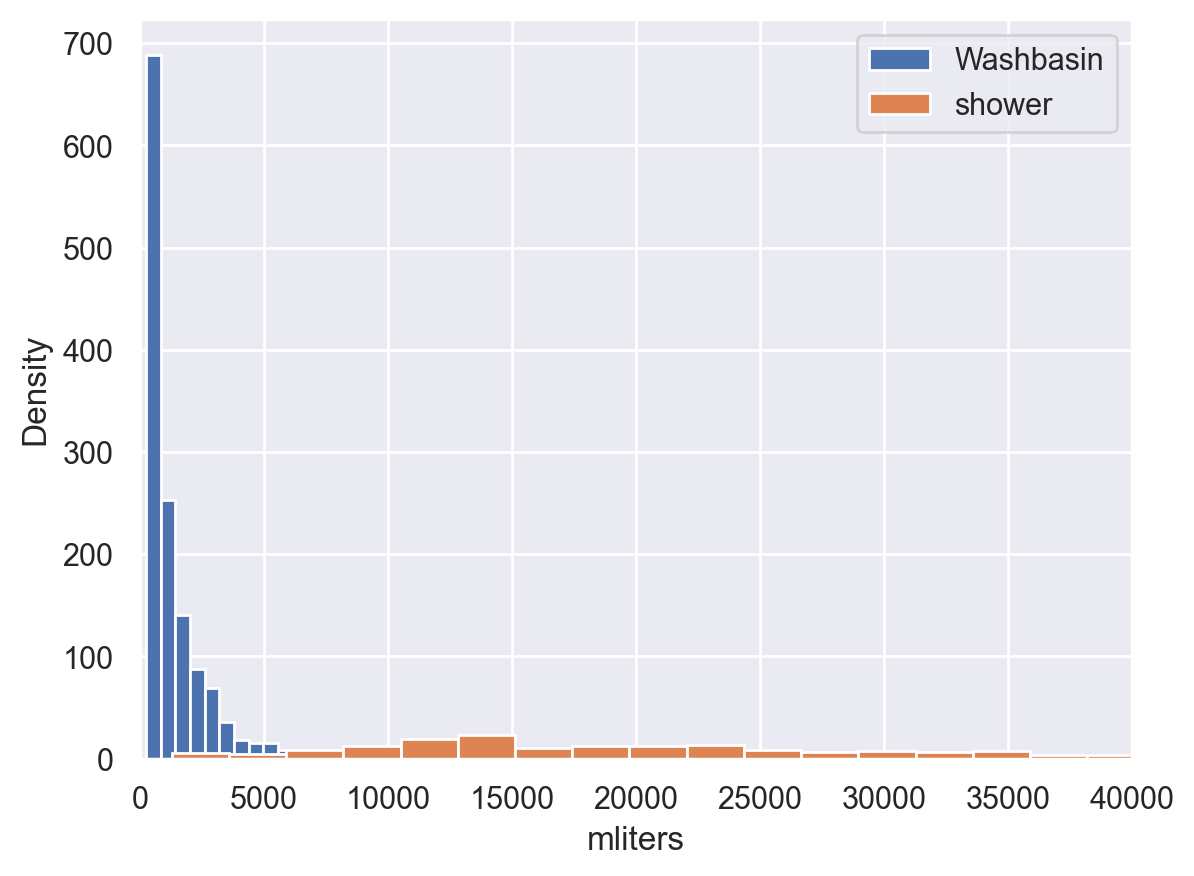

In [6]:
# washbasin VS shower

# fixtureのカラムがwashbasinのものをヒストグラム化
water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(bins=40,
    label="Washbasin"
)

# fixtureのカラムがshowerのものをヒストグラム化
water_data.loc[water_data["fixture"] == "shower", "liters"].hist(bins=40,
    label="shower"
)


plt.xlim(0,40000)
plt.xlabel("mliters")
plt.ylabel("Density")
plt.legend()
plt.show()

In [3]:
water_data.head()

,duration,liters,month,hour,day,max_flow,fixture,num_fixture,av_flow_rate,sec_from_midnight
0,1290,30479,10,8,1,27,bidet,1,23.627132,23339
1,261,9502,3,18,6,51,bidet,1,36.406130,62624
2,183,8869,10,0,4,67,bidet,1,48.464481,80073
3,103,8126,8,18,3,90,bidet,1,78.893204,60721
4,140,7796,4,2,5,148,bidet,1,55.685714,2342


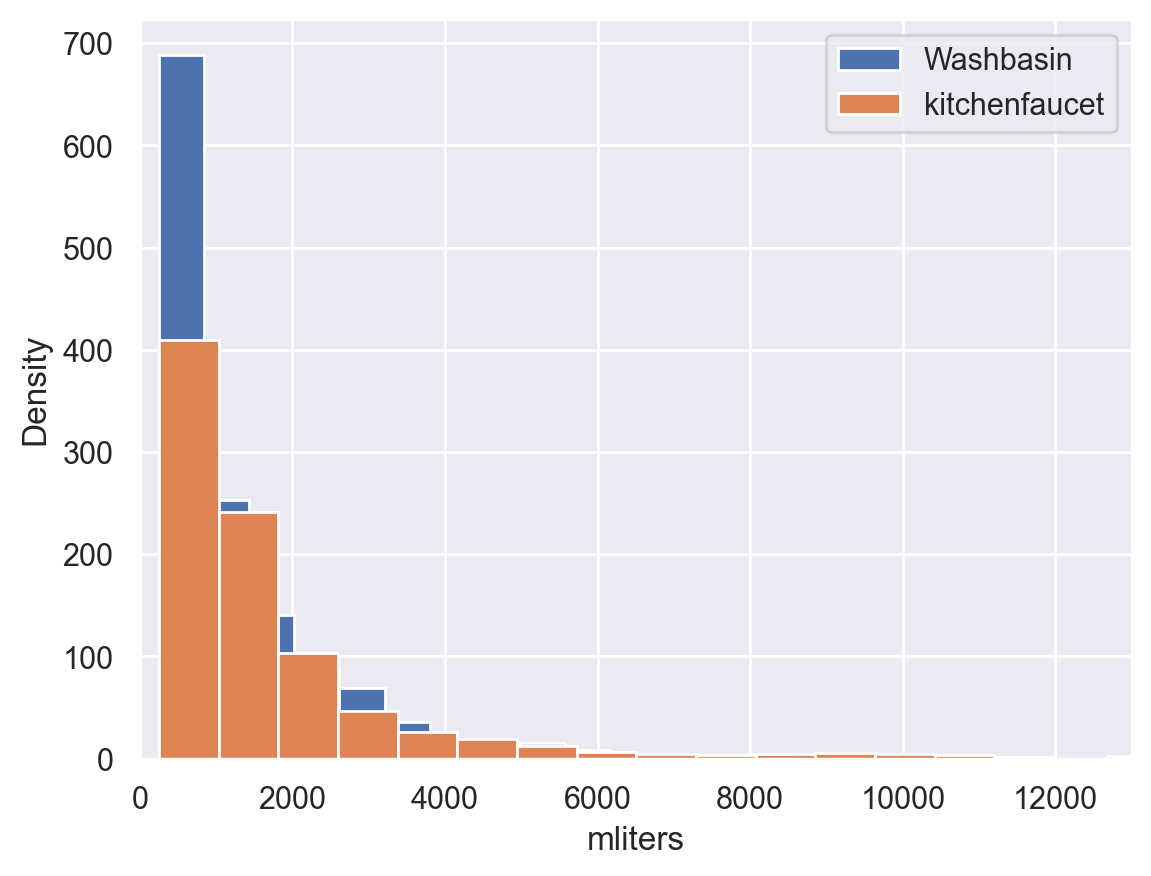

In [8]:
# washbasin VS kitchenfaucet

plt.figure()
water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(bins=40,
    label="Washbasin"
)
water_data.loc[water_data["fixture"] == "kitchenfaucet", "liters"].hist(bins=40,
    label="kitchenfaucet"
)


plt.xlim(0,13000)
plt.xlabel("mliters")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
# Bootstrapping
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    
    # パーセンタイルを計算して信頼区間の境界を生成します。
    # 100 * alpha / 2.0 は下位パーセンタイル（例：alpha=0.05の場合は2.5%）、
    # 100 * (1 - alpha / 2.0) は上位パーセンタイル（例：alpha=0.05の場合は97.5%）を表します。
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    
    # 計算された信頼区間の境界（下限と上限）を返します。
    return boundaries

In [5]:



# Save the data about the washbasin and Kitchen faucet to split the dataset
wb_liters = water_data.loc[
    water_data["fixture"] == "washbasin", "liters"
].values
kit_liters = water_data.loc[
    water_data["fixture"] == "kitchenfaucet", "liters"
].values

show_liters = water_data.loc[
    water_data["fixture"] == "shower", "liters"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
wb_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(wb_liters, 5000)
]
kit_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(kit_liters, 5000)
]

show_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(show_liters, 5000)
]

# Print the resulting interval estimates
print(
    "mliters consumed by washbasin: mean interval", stat_intervals(wb_liters_mean_scores, 0.05)
)
print(
    "mliters consumed by kitchenfaucet: mean interval", stat_intervals(kit_liters_mean_scores, 0.05)
)

print(
    "mliters consumed by shower: mean interval", stat_intervals(show_liters_mean_scores, 0.05)
)

mliters consumed by washbasin: mean interval [1343.74715657 1547.52730798]
mliters consumed by kitchenfaucet: mean interval [1644.55840782 1953.05427374]
mliters consumed by shower: mean interval [20094.71101695 24334.08135593]


⇧これは単に、それぞれの使用用途データ別にBootstrappingして、平均を元に信頼区間を出してるだけ。